In [15]:
phishingTrainPath = "/content/PhishingTrainData_Claflin.xlsx"
phishingTestPath = "/content/spamPhishingTestData_Claflin.xlsx"

In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_excel(phishingTrainPath)
data.head()

,sn,subject,message,target
0,NaN,JOB FORUM : Get Paid to Drive,Company’s Name:\nHavas Sport And Entertainment...,1
1,NaN,"Mail Serv. shared ""Faculty EvaluaWon Transcrip...",Mail Serv. shared a file with you\nKindly chec...,1
2,NaN,GET PAID WHILE DRIVING YOUR CAR.,\nJOB TITLE:\n \nAdverWse While Driving\n \n \...,1
3,NaN,MICROSOFT 365 MISSED VOICEMAIL IN YOUR MAILBOX,"You have a missed voicemail from Guinyard, Rut...",1
4,NaN,Mrs.Rosa Gomes.,Dear Beloved\nLife is gradually passing away f...,1


In [18]:
data.head()

,sn,subject,message,target
0,NaN,JOB FORUM : Get Paid to Drive,Company’s Name:\nHavas Sport And Entertainment...,1
1,NaN,"Mail Serv. shared ""Faculty EvaluaWon Transcrip...",Mail Serv. shared a file with you\nKindly chec...,1
2,NaN,GET PAID WHILE DRIVING YOUR CAR.,\nJOB TITLE:\n \nAdverWse While Driving\n \n \...,1
3,NaN,MICROSOFT 365 MISSED VOICEMAIL IN YOUR MAILBOX,"You have a missed voicemail from Guinyard, Rut...",1
4,NaN,Mrs.Rosa Gomes.,Dear Beloved\nLife is gradually passing away f...,1


In [19]:
data = data.drop('sn', axis=1)

dataX = data.drop('target', axis=1)
subject_data = dataX.drop('message', axis=1)
message_data = dataX.drop('subject', axis=1)

dataYRaw = data.drop('subject', axis=1)
dataY = dataYRaw.drop('message', axis=1)

print(data.head())
print(dataX.head())
print(dataY.head())

                                             subject  ... target
0                      JOB FORUM : Get Paid to Drive  ...      1
1  Mail Serv. shared "Faculty EvaluaWon Transcrip...  ...      1
2                   GET PAID WHILE DRIVING YOUR CAR.  ...      1
3     MICROSOFT 365 MISSED VOICEMAIL IN YOUR MAILBOX  ...      1
4                                    Mrs.Rosa Gomes.  ...      1

[5 rows x 3 columns]
                                             subject                                            message
0                      JOB FORUM : Get Paid to Drive  Company’s Name:\nHavas Sport And Entertainment...
1  Mail Serv. shared "Faculty EvaluaWon Transcrip...  Mail Serv. shared a file with you\nKindly chec...
2                   GET PAID WHILE DRIVING YOUR CAR.  \nJOB TITLE:\n \nAdverWse While Driving\n \n \...
3     MICROSOFT 365 MISSED VOICEMAIL IN YOUR MAILBOX  You have a missed voicemail from Guinyard, Rut...
4                                    Mrs.Rosa Gomes.  Dear Beloved\n

In [20]:
# subject_data = dataX.drop('message', axis=1)
# message_data = dataX.drop('subject', axis=1)

In [21]:
subject_data.head()

,subject
0,JOB FORUM : Get Paid to Drive
1,"Mail Serv. shared ""Faculty EvaluaWon Transcrip..."
2,GET PAID WHILE DRIVING YOUR CAR.
3,MICROSOFT 365 MISSED VOICEMAIL IN YOUR MAILBOX
4,Mrs.Rosa Gomes.


In [22]:
message_data.head()

,message
0,Company’s Name:\nHavas Sport And Entertainment...
1,Mail Serv. shared a file with you\nKindly chec...
2,\nJOB TITLE:\n \nAdverWse While Driving\n \n \...
3,"You have a missed voicemail from Guinyard, Rut..."
4,Dear Beloved\nLife is gradually passing away f...


In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def cleanText(messagesColumn):
  cleanRow = ""
  for words in messagesColumn.split():
    if len(words) > 2 and words not in stop:
      print(words)
      cleanRow = cleanRow + " " + words
  return cleanRow

In [ ]:
cleanSubject = subject_data['subject'].apply(lambda row: cleanText(row))
cleanSubject = pd.DataFrame({"newSubject": cleanSubject})

cleanMessage = message_data['message'].apply(lambda row: cleanText(row))
cleanMessage = pd.DataFrame({'newMessage':cleanMessage})

# baluwapati deupur 7 kavreplanchowk nagarpalika <3 <3

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizerSub = CountVectorizer()
vectorizerMsg = CountVectorizer()

vectorizerSub.fit(cleanSubject['newSubject'])
vectorizerMsg.fit(cleanMessage['newMessage'])

vectorSubject = vectorizerSub.transform(cleanSubject['newSubject'])
vectorMessage = vectorizerMsg.transform(cleanMessage['newMessage'])

print("line 11: ", vectorSubject.shape, vectorMessage.shape)

vectorSubject = vectorSubject.toarray()
vectorMessage = vectorMessage.toarray()


print("line 118: ", vectorSubject.shape, vectorMessage.shape)

print(type(vectorSubject))
print(type(vectorMessage))

x_phishingTrain = np.hstack((vectorSubject, vectorMessage))

#commented for now.
#print("Vector is: \n \n ", vector)
#vector.shape

# print("type of vector is: ", type(vector))

# x_phishing = vector.toarray()




#x_phishing = vector.tolist()

# combined = np.hstack((v1, v2))

# vectorizer.fit(xClean['newMessage'])
# print(vectorizer.vocabulary_)
# vector = vectorizer.transform(xClean['newMessage'])
# x_value = vector.toarray()

# print(vector.shape)
# print(vector)
# print(type(vector))
# print(vector.toarray())
# print("Shape of matrix", x_value.shape)
# print(x_value[0])

line 11:  (56, 183) (56, 1527)
line 118:  (56, 183) (56, 1527)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [27]:
y_phishingTrain = dataY['target']

In [28]:
y_phishingTrain.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [29]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_value, y_data['target'], test_size=0.1, random_state=42)

In [30]:
# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

lr = LogisticRegression()
lr.fit(x_phishingTrain, y_phishingTrain)

# print("Predecting training data: ")

# predicted = lr.predict(x_train)

# print("The F1 score is: ", f1_score(predicted, y_train))
# print("The accuracy score is: ", accuracy_score(predicted, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# Testing part 
# testing Claflin Emails 
# test data includes both Spam and non-Spam emails

In [33]:
# Reading testing data from excel file
testData = pd.read_excel(phishingTestPath)
testData.head()

,subject,message,target
0,NEW INV: 958-496,"Good morning,\nPlease find attache incoming pe...",1
1,Direct Deposit Authorization.,\nОт: Юлия Юриста\nОтправлено: 26 ноября 2019...,1
2,Part-time/Job Opportunity!!!,"Hello,\nThis Job is currently recruiting. A J...",1
3,IMPORTANT,Please carefully read this important message p...,1
4,Part-time/Job Opportunity!!!,"Hello,\nThis Job is currently recruiting. A J...",1


In [34]:
# Extracting testing dataset into respective subsections/lists

testDataX = testData.drop('target', axis=1)
testSubjectData = testDataX.drop('message', axis=1)
testMessageData = testDataX.drop('subject', axis=1)

testRawY = testData.drop('subject', axis=1)
testDataY = testRawY.drop('message', axis=1)


In [35]:
# print(testSubjectData.head())
# print(testMessageData.head())
# print(testDataY.head())

In [ ]:
# Cleaning testing dataset

cleanTestSubject = testSubjectData['subject'].apply(lambda row: cleanText(row))
cleanTestSubject = pd.DataFrame({'newSubject': cleanTestSubject})

cleanTestMessage = testMessageData['message'].apply(lambda row: cleanText(row))
cleanTestMessage = pd.DataFrame({"newMessage": cleanTestMessage})

In [37]:
# Vectorizing testing dataset

vectorTestSub = vectorizerSub.transform(cleanTestSubject['newSubject'])
vectorTestMsg = vectorizerMsg.transform(cleanTestMessage['newMessage'])

vectorTestSub = vectorTestSub.toarray()
vectorTestMsg = vectorTestMsg.toarray()

x_phishingTest = np.hstack((vectorTestSub, vectorTestMsg))
y_phishingTest = testDataY['target']

In [38]:
print("Predecting Claflin's phishing email data by Linear Regression: \n")

predicted = lr.predict(x_phishingTest)

print("The F1 score is: ", f1_score(predicted, y_phishingTest))
print("The accuracy score is: ", accuracy_score(predicted, y_phishingTest))

Predecting Claflin's phishing email data by Linear Regression: 

The F1 score is:  0.7692307692307692
The accuracy score is:  0.775


[[16  4]
 [ 5 15]]


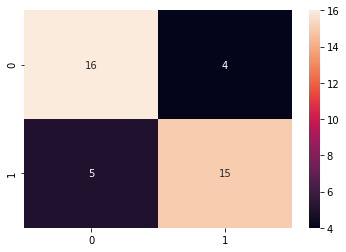

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_phishingTest, predicted)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True)